# Temperature forcast

###### Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

###### Attribute Information:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [70]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_row',25)
pd.set_option('display.max_column',25)

In [71]:
# Load the dataset
df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/Temperature.csv")

In [72]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


### EDA

In [73]:
# checking the datatypes of all the features
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [74]:
# Grouping features into continuous variables

num_vars= [x for x in df.columns if df[x].dtypes !='O']
df[num_vars]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [75]:
# checking the shape of the dataset
df.shape

(7752, 25)

In [76]:
# checking the null values if any present

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [77]:
# filling the null values with mean
df=df.fillna(df.mean())

<ipython-input-77-5496e238be65>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [78]:
# checking for null values again
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [79]:
# checking the value_Counts of Date
df['Date'].value_counts()

30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64

In [80]:
# checking the shape of the dataset
df.shape

(7752, 25)

In [81]:
# checking for null values if dataset is having any
df.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [82]:
# function for imputation

def imputation(df):
    df = df.dropna(axis=0)
    return df

In [83]:
imputation(df)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [84]:
# checking for statistical parameters

df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


##### Key Insights:

* Dataset is having NAN values which is treated by using mean of the same feature
* Either there is no skewness or it has less skewness
* Most of the features are of type float and only one feature date is of type Object
* There are count of 7752 records in the dataset & 25 features are present.
* There are minimum value 0 in 8 columns


### Univariate Analysis

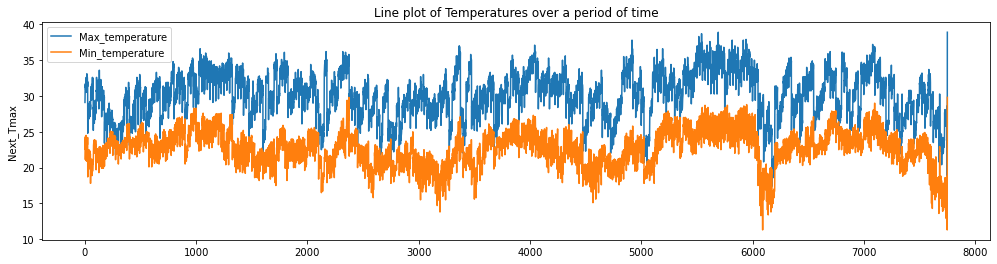

In [85]:
# Create a line plot
plt.figure(figsize=(17,4))

sns.lineplot(data=df['Next_Tmax'],label="Max_temperature")
sns.lineplot(data=df['Next_Tmin'],label="Min_temperature")
plt.title('Line plot of Temperatures over a period of time')
plt.show()

Max Temperature is ranging from 25-35`C & Next_Min Temperature is ranging form 0-25`C.

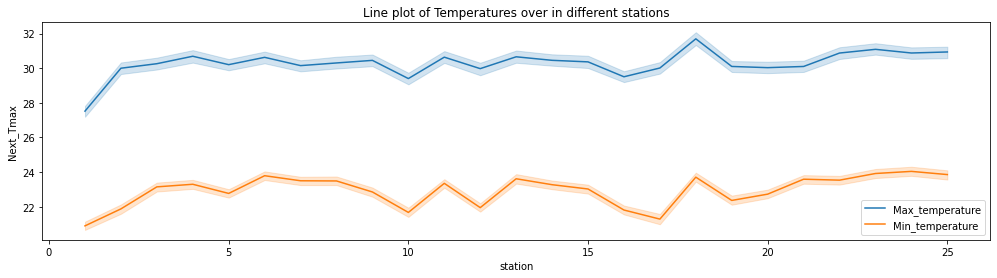

In [86]:
plt.figure(figsize=(17,4))

sns.lineplot(x='station',y='Next_Tmax',data=df,label="Max_temperature")
sns.lineplot(x='station',y='Next_Tmin',data=df,label="Min_temperature")
sns.lineplot()
plt.title('Line plot of Temperatures over in different stations')
plt.show()

###### Above plot shows the variations in the maximum  & Minimum temperature across different stations.

In [87]:
df_cols= df.drop('Date',axis=1)

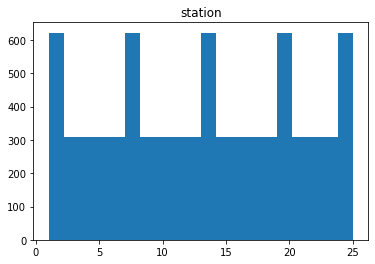

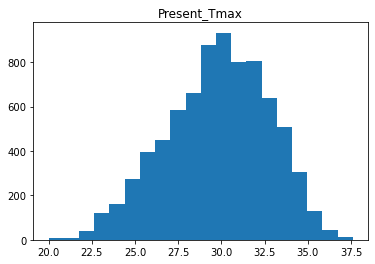

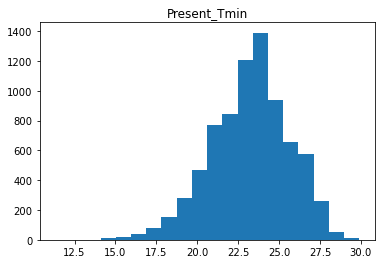

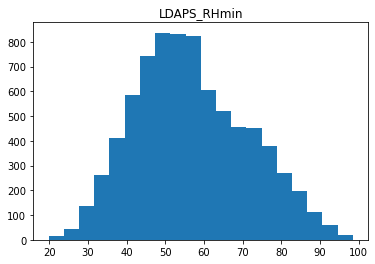

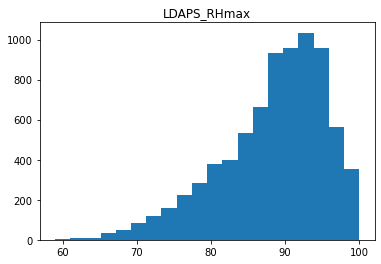

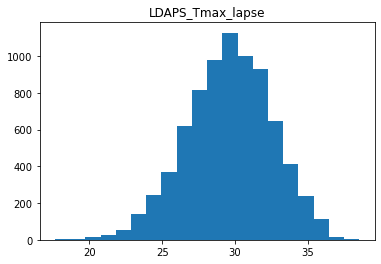

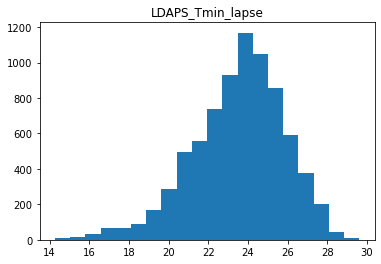

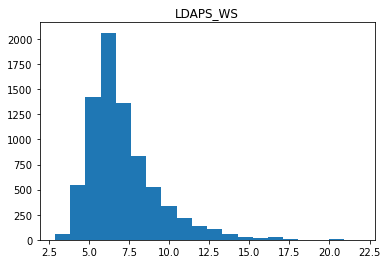

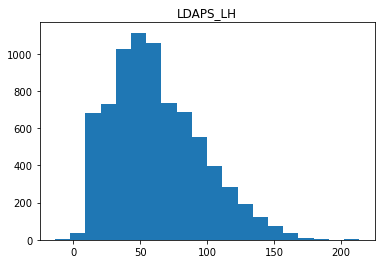

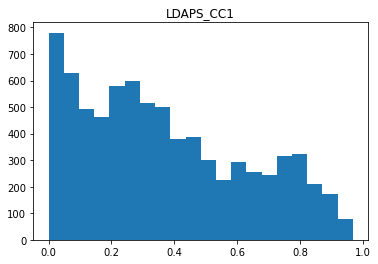

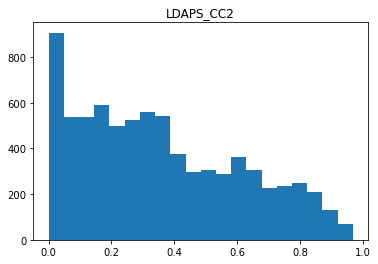

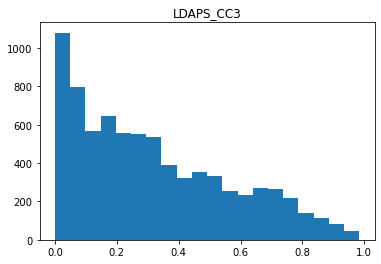

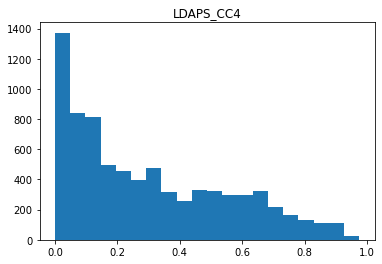

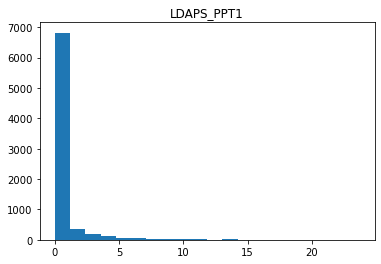

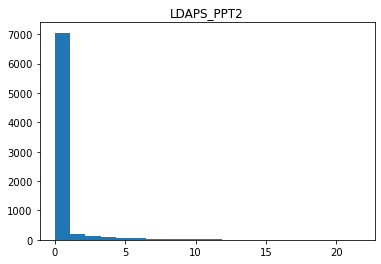

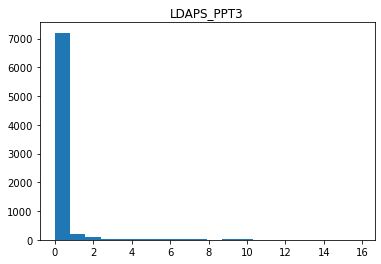

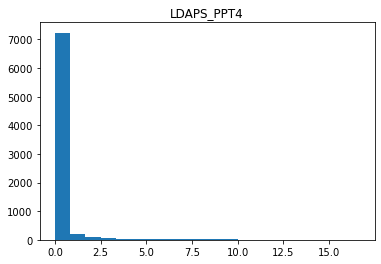

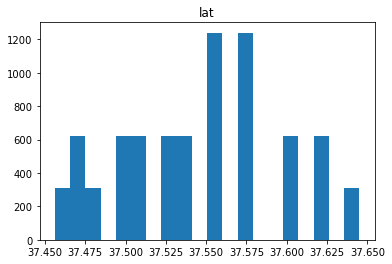

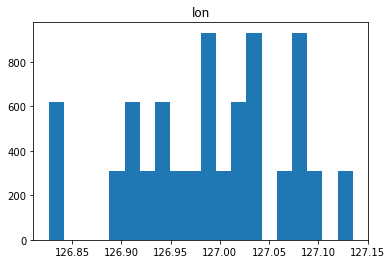

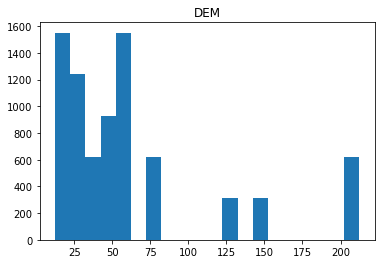

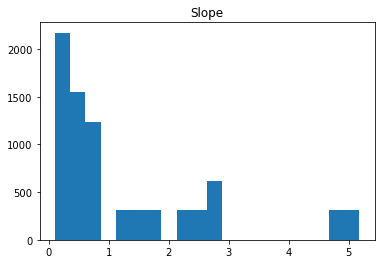

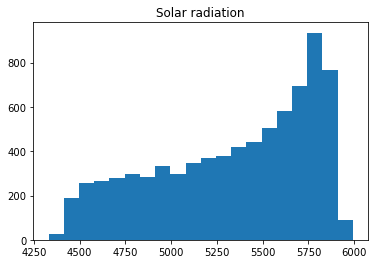

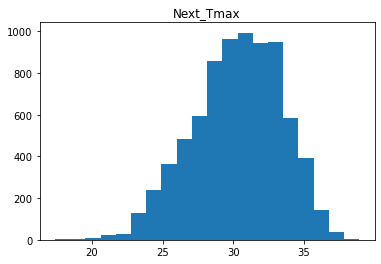

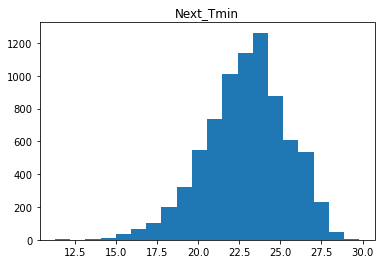

In [88]:
# plotting histplot
for i in df_cols:
    plt.hist(df[i],bins=20)
    plt.title(i)
    plt.show()

###### some of the columns are left & some are Right skewed. we will treat it to get it removed

In [89]:
# checking for skewness in the dataset
df.skew()

<ipython-input-89-296bdba4e1f7>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

### Multivariate Analysis

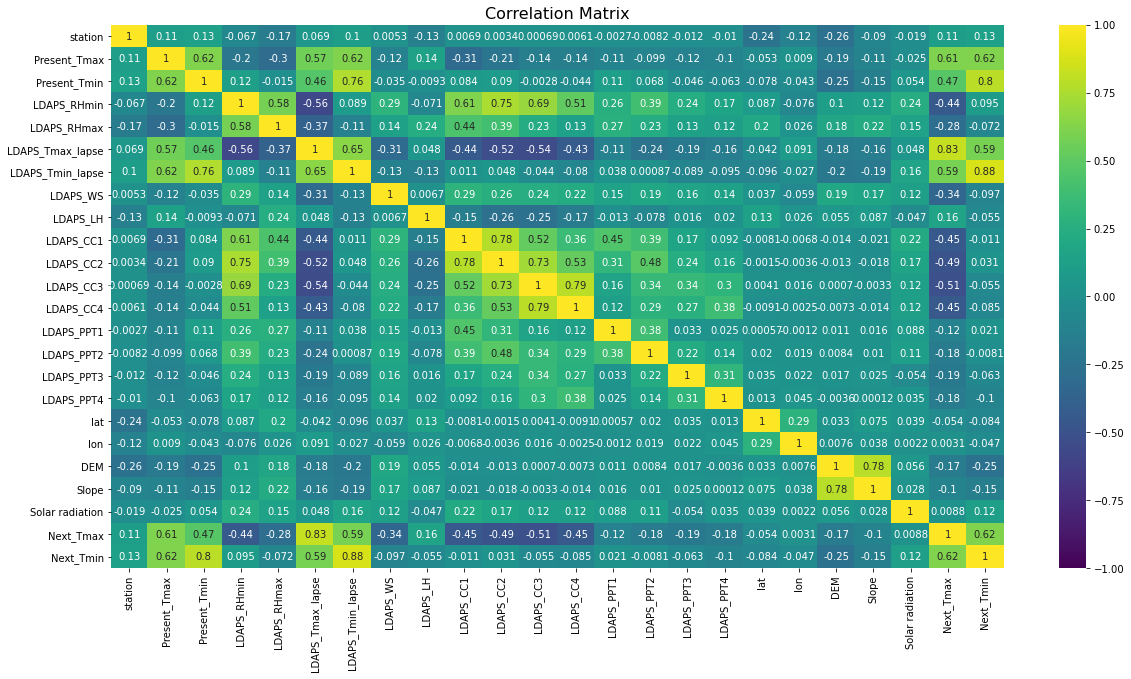

In [90]:
# plotting Heatmap to check the corelation of each and every feature with Target feature
fx, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True)
plt.show()

we have negetive corelation between LDAPS_WS,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 with the Target variable Next_Tmax. but removing them wont make any sense in our model building

In [91]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [92]:
df.drop('Date',axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


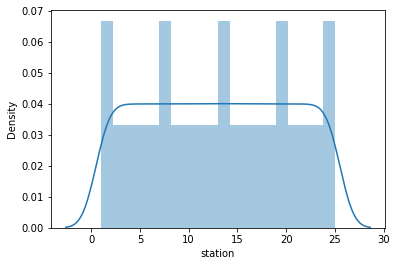

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


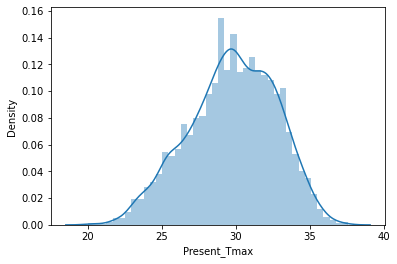

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


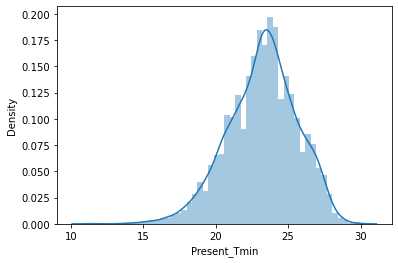

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


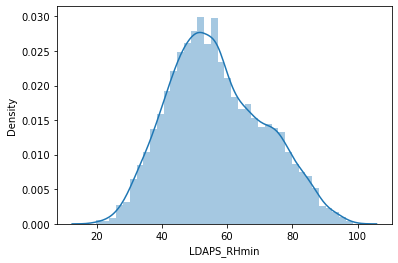

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


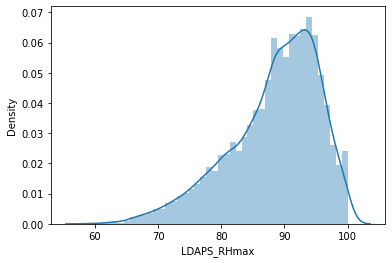

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


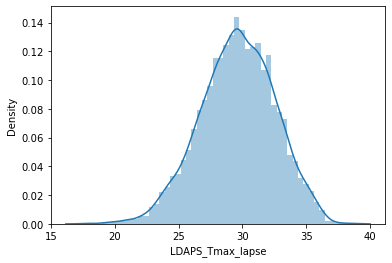

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


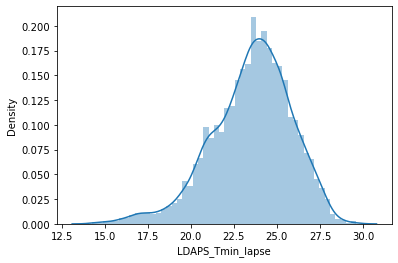

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


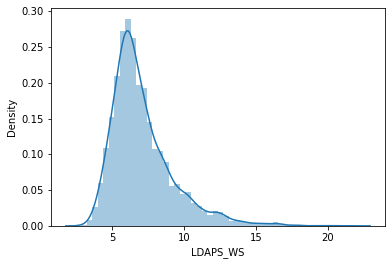

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


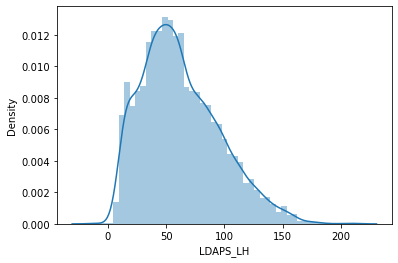

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


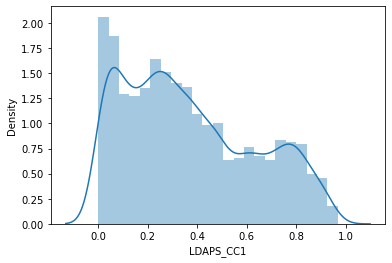

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


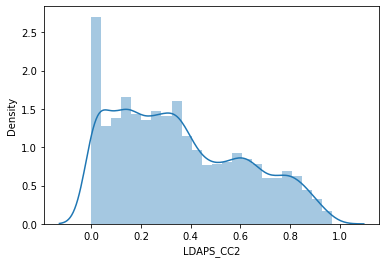

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


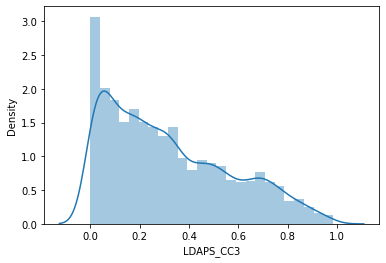

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


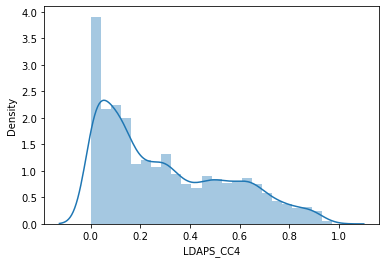

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


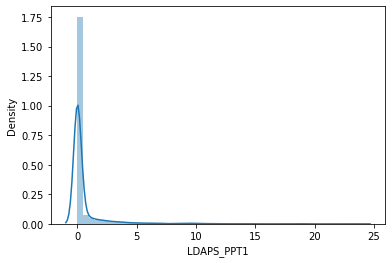

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


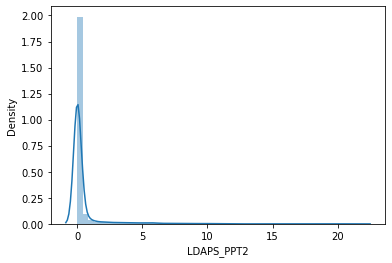

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


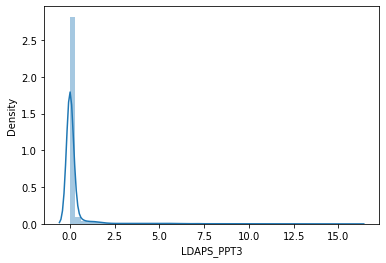

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


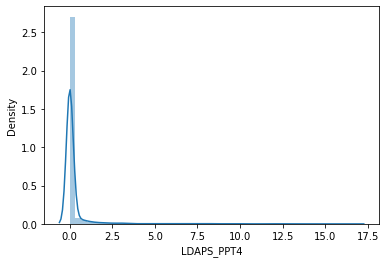

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


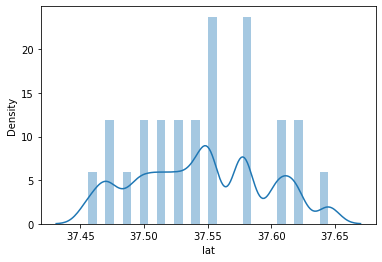

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


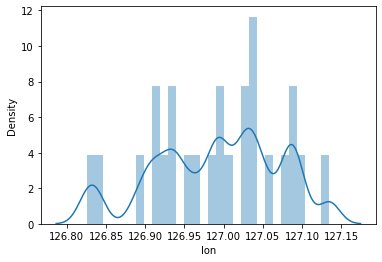

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


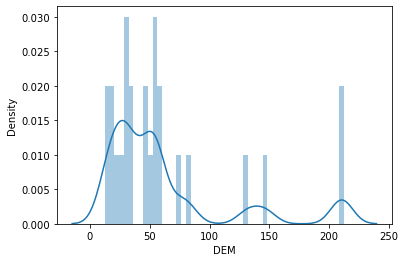

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


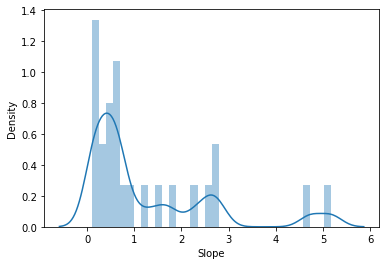

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


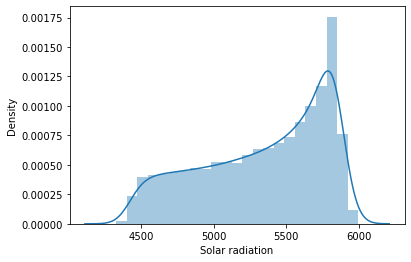

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


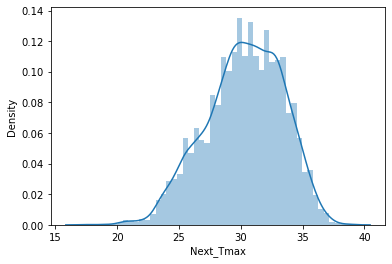

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


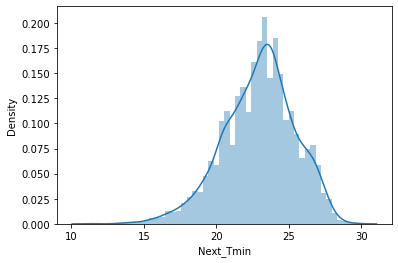

In [93]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

###### We can see some of the features are normally distributed and many are either right or left skewed

In [97]:
y1=df.iloc[:,-1:]
y2=df.iloc[:,-2:-1]
x=df.iloc[:,:-2]

Next_Tmax    184
dtype: int64

In [98]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')
x= pd.DataFrame(x)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3202: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


### Data Modelling

In [99]:
# importing required libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error


In [100]:
x_train,x_test,y_train,y_test= train_test_split(x,y1,test_size=0.3,random_state=42)


In [101]:
models = [('lr',LinearRegression()),('ridge',Ridge()),('lasso',Lasso()),('rfr',RandomForestRegressor()),
         ('xgb',XGBRegressor()),('dtr',DecisionTreeRegressor()),('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet())]

### Scaling dataset

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_xtrain=scaler.fit_transform(x_train)
standardized_xtest=scaler.fit_transform(x_test)
column_names = x_train.columns
col_names = x_test.columns
df_standardized_xtrain= pd.DataFrame(data=standardized_xtrain,columns=column_names)
df_standardized_xtest= pd.DataFrame(data=standardized_xtest,columns=col_names)

In [103]:
#function for selection of model based on cross validation scores
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

##### Cross Validation

In [104]:
#cross val scores for training set
basic_model_selection(standardized_xtrain,y_train,10,models)

lr 0.8187030785035635
ridge 0.8187041837930191
lasso 0.6163323264377675
rfr 0.8987026090241981
xgb 0.9219131329159399
dtr 0.7665207530450001
br 0.8844712730260443
gbr 0.8804676128316957
en 0.673802103999386


### Hyper parameter Tuning

In [44]:
#defining parameters for RandomForestRegressor & XGBoostRegressor

parameters_rfr = {
    'max_depth' : [2,3,None],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [1,2,4],
    'n_estimators' : [100,150,200]
                 }
parameters_xgb = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
                 }

In [37]:
rnd_search = GridSearchCV(RandomForestRegressor(),
                        parameters_rfr,
                        n_jobs=-1,
                        cv = 3,
                        verbose=True)
rnd_search.fit(standardized_xtrain,y_train)
y_predicted = rnd_search.predict(standardized_xtest)
# predictions=y_predicted.reshape(5426,1)
print(rnd_search.score)
print(rnd_search.best_params_)
# print("The RMSE score is",np.sqrt(np.mean((y_test-y_predicted)**2)))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


<bound method BaseSearchCV.score of GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             verbose=True)>
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [105]:
# At first we will fit & predict the values using RandomForestRegressor model

rnd=RandomForestRegressor(max_depth=None,min_samples_leaf=1,min_samples_split=2,max_features='auto',n_estimators=150,oob_score=True,random_state=42)
rnd.fit(standardized_xtrain,y_train)
predict_rnd=rnd.predict(standardized_xtest)

<ipython-input-105-dda0ef898db7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd.fit(standardized_xtrain,y_train)


In [106]:
prediction = list(predict_rnd)
predicted_df = {'predicted_values': prediction, 'original_values': y_test.values.ravel()}
#creating new dataframe
df=pd.DataFrame(predicted_df)

In [107]:
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test, prediction))
print("MSE : ",mean_squared_error(y_test,prediction))
print("MAE : ",mean_absolute_error(y_test,prediction))

r2_score:  0.8925754653256066
MSE :  0.6585204909086849
MAE :  0.604439801502828


##### using XGBRegressor

In [45]:
xgb_search = GridSearchCV(XGBRegressor(),
                        parameters_xgb,
                        n_jobs=-1,
                        cv = 3,
                        verbose=True)
xgb_search.fit(x_train,y_train)
y_predicted = xgb_search.predict(x_test)
print(xgb_search.score)
print(xgb_search.best_params_)
# print("The RMSE score is",np.sqrt(np.mean((y_train-y_predicted)**2)))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
          

In [108]:
# Finally we will fit & predict the values using XGBRegressor model

xgb= XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth=5, min_child_weight= 5, n_estimators=500, objective='reg:squarederror', subsample= 0.7)
xgb.fit(standardized_xtrain,y_train)
predict_xgb=xgb.predict(standardized_xtest)

In [109]:
# creating dataframe of original & predicted values 

prediction1 = list(predict_xgb)
predicted_df1 = {'predicted_values': prediction, 'original_values': y_test.values.ravel()}
#creating new dataframe
df1=pd.DataFrame(predicted_df1)

In [110]:
# finding different metrics related to the model performance

from sklearn.metrics import r2_score
print("r2_score :",r2_score(y_test, prediction1))
print("MSE : ",mean_squared_error(y_test,prediction1))
print("MAE : ",mean_absolute_error(y_test,prediction1))

r2_score : 0.9291044872443591
MSE :  0.43459483445354924
MAE :  0.4990629219402267


### Plotting Regression plot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


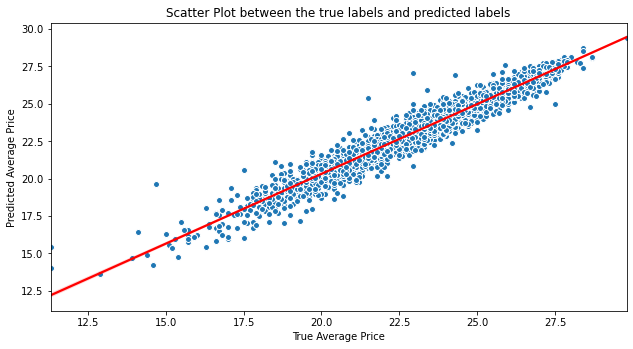

In [111]:
# plotting Regplot

fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot(y_test.values.ravel(),prediction1, linewidth = 1, ax = axes)
sns.regplot(y_test.values.ravel(),prediction1,data=df, scatter=False, color="Red")
plt.title('Scatter Plot between the true labels and predicted labels')
axes.set_xlabel("True Average Price")
axes.set_ylabel("Predicted Average Price")
plt.show()

In [112]:
# we will create pickel file

import pickle
filename = 'Temperature_max.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [113]:
# loading the pickel file for prediction & score

loaded_model = pickle.load(open('Temperature_max.pkl', 'rb'))
result = loaded_model.score(standardized_xtest, y_test)
print(result*100)

92.91044872443591


In [114]:
conclusion=pd.DataFrame([loaded_model.predict(standardized_xtest)[:],y_test.values.ravel()[:]],index=["Predicted","Original"])

In [115]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,...,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325
Predicted,21.138367,27.344593,21.459579,25.089893,26.15037,19.505594,24.821264,22.492561,26.16699,22.364,25.235983,23.590736,...,25.752518,27.082834,22.313038,25.039333,24.277393,24.017908,26.288979,21.424721,23.07259,25.0233,21.846275,22.813347
Original,20.300000,27.500000,21.200000,25.200000,26.00000,19.600000,25.400000,21.500000,25.60000,22.900,24.400000,24.200000,...,26.200000,27.000000,22.000000,24.100000,23.700000,23.800000,26.200000,21.700000,22.60000,25.0000,22.100000,22.500000


### Splitting train & test dataset

In [116]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y2,test_size=0.3,random_state=42)
Y_train.nunique()

Next_Tmax    176
dtype: int64

### Scaling of the dataset

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_xtrain=scaler.fit_transform(X_train)
standardized_xtest=scaler.fit_transform(X_test)
column_names = X_train.columns
col_names = X_test.columns
df_standardized_xtrain= pd.DataFrame(data=standardized_xtrain,columns=x.columns)
df_standardized_xtest= pd.DataFrame(data=standardized_xtest,columns=x.columns)

In [118]:
#cross val scores for training set
basic_model_selection(standardized_xtrain,Y_train,10,models)

lr 0.7526457573120283
ridge 0.7526470050093514
lasso 0.5748396973533971
rfr 0.8833995765124744
xgb 0.9002840042785522
dtr 0.7389307330768233
br 0.8660786851712299
gbr 0.8367314921971151
en 0.6245564412188683


##### using RandomTreeRegressor to predict maximum temperature


In [57]:
rnd_search = GridSearchCV(RandomForestRegressor(),
                        parameters_rfr,
                        n_jobs=-1,
                        cv = 3,
                        verbose=True)
rnd_search.fit(standardized_xtrain,y_train)
y_predicted = rnd_search.predict(standardized_xtest)
# predictions=y_predicted.reshape(5426,1)
print(rnd_search.score)
print(rnd_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             verbose=True)>
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [119]:
# At first we will fit & predict the values using RandomForestRegressor model

rnd=RandomForestRegressor(max_depth=None,min_samples_leaf=1,min_samples_split=2,max_features='auto',n_estimators=150,oob_score=True,random_state=42)
rnd.fit(standardized_xtrain,y_train)
predict_rnd=rnd.predict(standardized_xtest)

<ipython-input-119-dda0ef898db7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd.fit(standardized_xtrain,y_train)


In [120]:
prediction = list(predict_rnd)
predicted_df = {'predicted_values': prediction, 'original_values': y_test.values.ravel()}
#creating new dataframe
df=pd.DataFrame(predicted_df)

In [121]:
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test, prediction))
print("MSE : ",mean_squared_error(y_test,prediction))
print("MAE : ",mean_absolute_error(y_test,prediction))

r2_score:  0.8925754653256066
MSE :  0.6585204909086849
MAE :  0.604439801502828


##### using XGBRegressor

In [46]:
model_parameter_tuning(standardized_xtrain,y_train,XGBRegressor(),parameters_xgb,3)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
          

In [140]:
# Finally we will fit & predict the values using XGBRegressor model

xgb= XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth=7, min_child_weight= 5, n_estimators=500, objective='reg:squarederror', subsample= 0.5)
xgb.fit(standardized_xtrain,Y_train)
predict_xgb=xgb.predict(standardized_xtest)

In [141]:
# creating dataframe of original & predicted values 

prediction1 = list(predict_xgb)
predicted_df1 = {'predicted_values': prediction1, 'original_values': Y_test.values.ravel()}
#creating new dataframe
df1=pd.DataFrame(predicted_df1)

In [142]:
from sklearn.metrics import r2_score
print("r2_score: ",r2_score(Y_test, prediction1))
print("MSE : ",mean_squared_error(Y_test,prediction1))
print("MAE : ",mean_absolute_error(Y_test,prediction1))

r2_score:  0.9149818271231333
MSE :  0.8352187977696409
MAE :  0.6819698363380627


###### Since XGBR r2_score is higher compared to RAND we will consider the same model to predict our outcomes


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


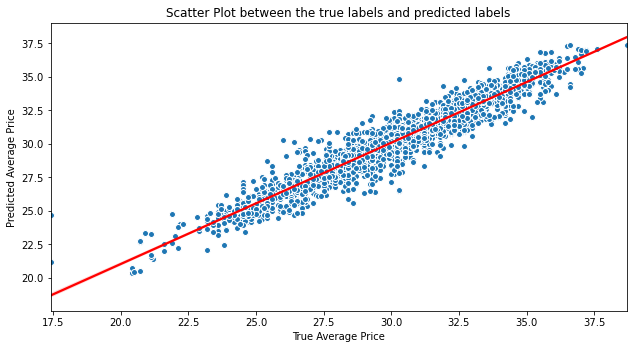

In [143]:
# plotting Regplot

fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot(Y_test.values.ravel(),prediction1, linewidth = 1, ax = axes)
sns.regplot(Y_test,prediction1,data=df, scatter=False, color="Red")
plt.title('Scatter Plot between the true labels and predicted labels')
axes.set_xlabel("True Average Price")
axes.set_ylabel("Predicted Average Price")
plt.show()

In [144]:
# we will create pickel file

import pickle
filename = 'Temperature_min.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [148]:
# loading the pickel file for prediction & score

loaded_model = pickle.load(open('Temperature_min.pkl', 'rb'))
result = loaded_model.score(standardized_xtest, Y_test)
print(result*100)

91.49818271231332


In [149]:
conclusion=pd.DataFrame([loaded_model.predict(standardized_xtest)[:],Y_test.values.ravel()[:]],index=["Predicted","Original"])

In [150]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,...,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325
Predicted,28.159782,36.138832,25.482006,35.337963,32.12479,30.150419,31.795715,34.691631,31.873053,26.859493,30.734077,29.908403,...,31.924093,35.731155,35.083492,34.292206,29.846506,28.66539,33.496166,26.941021,29.494822,31.422024,26.488729,28.983028
Original,28.300000,35.900000,25.300000,35.900000,33.40000,28.600000,30.900000,33.600000,32.900000,25.500000,29.300000,32.200000,...,31.300000,36.100000,34.500000,34.200000,30.800000,28.80000,34.000000,27.100000,29.700000,32.300000,26.800000,29.100000


#### Conclusion:

We got nearest prediction to the original alues of Temperature by using XGB in both Tmax & Tmin features so we considered the same to predict.We can deploy the model.